<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Determine-pedGES" data-toc-modified-id="Determine-pedGES-5">Determine pedGES</a></span></li><li><span><a href="#Univariable-model" data-toc-modified-id="Univariable-model-6">Univariable model</a></span></li><li><span><a href="#Multivariable-model" data-toc-modified-id="Multivariable-model-7">Multivariable model</a></span></li><li><span><a href="#Validate-PedGES" data-toc-modified-id="Validate-PedGES-8">Validate PedGES</a></span></li><li><span><a href="#Riaz-et-al" data-toc-modified-id="Riaz-et-al-9">Riaz et al</a></span><ul class="toc-item"><li><span><a href="#Reproduce-KM-for-mutation-load-Fig-1B" data-toc-modified-id="Reproduce-KM-for-mutation-load-Fig-1B-9.1">Reproduce KM for mutation load Fig 1B</a></span></li><li><span><a href="#Cleanup-clinical-data-and-tpm-matrix" data-toc-modified-id="Cleanup-clinical-data-and-tpm-matrix-9.2">Cleanup clinical data and tpm matrix</a></span><ul class="toc-item"><li><span><a href="#Make-a-table-of-SRR,-sample-name-and-pt-id" data-toc-modified-id="Make-a-table-of-SRR,-sample-name-and-pt-id-9.2.1">Make a table of SRR, sample name and pt id</a></span></li></ul></li><li><span><a href="#PedGES-and-add-to-clinical-data" data-toc-modified-id="PedGES-and-add-to-clinical-data-9.3">PedGES and add to clinical data</a></span></li><li><span><a href="#Test-PedGES" data-toc-modified-id="Test-PedGES-9.4">Test PedGES</a></span></li></ul></li><li><span><a href="#INSPIRE" data-toc-modified-id="INSPIRE-10">INSPIRE</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(survival)
library(survminer)

Loading required package: ggplot2

Loading required package: ggpubr



# Functions


In [3]:
source("~/OneDrive - UHN/R_src//ggplot2_theme.R")

In [4]:
gm_mean <- function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"

# Main

In [6]:
gene_module_th <- read.csv(file = paste0(datapath, "WGCNA/TH/gene_module_treehouse_manual_signed_20.csv"),
                                      header = T, stringsAsFactors = F,row.names = 1,check.names = F) 

In [7]:
gene_module_th <- gene_module_th[ gene_module_th$moduleColor != "grey",]

In [8]:
tail(gene_module_th)

,moduleLabel,moduleColor,ensembl_id_TH,ensembl_id,entrez
,<int>,<chr>,<chr>,<chr>,<int>
ZWINT,4,yellow,ENSG00000122952.16,ENSG00000122952,11130
ZXDA,6,red,ENSG00000198205.6,ENSG00000198205,7789
ZXDB,17,grey60,ENSG00000198455.4,ENSG00000198455,158586
ZXDC,6,red,ENSG00000070476.14,ENSG00000070476,79364
ZYG11B,17,grey60,ENSG00000162378.12,ENSG00000162378,79699
ZZZ3,6,red,ENSG00000036549.12,ENSG00000036549,26009


In [9]:
GO_modules <- read.csv(file.path(datapath,"WGCNA/TH/GO_TH_cons_manual_signed_20.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)  

In [10]:
GO_modules$moduleLabel <- gene_module_th$moduleLabel[match(GO_modules$module, gene_module_th$moduleColor)]

In [11]:
GO_modules <- GO_modules[GO_modules$termOntology == "BP",]

In [12]:
dim(gene_module_th)

[1] 3044    5

In [13]:
gene_module_th$moduleLabel <- paste0("TH_", gene_module_th$moduleLabel)

In [14]:
head(gene_module_th)

,moduleLabel,moduleColor,ensembl_id_TH,ensembl_id,entrez
,<chr>,<chr>,<chr>,<chr>,<int>
A2M,TH_22,darkgreen,ENSG00000175899.14,ENSG00000175899,2
AAK1,TH_7,black,ENSG00000115977.18,ENSG00000115977,22848
AASDH,TH_6,red,ENSG00000157426.13,ENSG00000157426,132949
AASDHPPT,TH_6,red,ENSG00000149313.10,ENSG00000149313,60496
ABCB10,TH_6,red,ENSG00000135776.4,ENSG00000135776,23456
ABCE1,TH_6,red,ENSG00000164163.10,ENSG00000164163,6059


In [15]:
metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [16]:
tpm_mat <- read.csv(file = paste0(datapath, "exp_mat/INDICATE.tpm_hg38_ENSG_HUGO.csv"), 
                    header = T, stringsAsFactors = F,check.names = F) 

In [17]:
dim(tpm_mat)

[1] 26475    75

In [18]:
tpm_mat[1:10,1:10]

,ensembl_id,HGNC_symbol,go29664_ngs_rna_targrna_rnaaccess_06520001b0023r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520003c0012r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520004c0018r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520005c0017r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520006c0016r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520007c0018r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520008c0017r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520010b0023r_20171125.genes.results
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000121410.11,A1BG,0.06,1.23,0.69,0.36,0.32,0.76,0.00,2.46
2,ENSG00000268895.5,A1BG-AS1,0.14,1.41,1.21,1.36,0.38,0.55,0.00,0.77
3,ENSG00000148584.14,A1CF,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ENSG00000175899.14,A2M,114.92,98.31,50.73,30.12,35.55,384.47,212.23,71.93
5,ENSG00000245105.2,A2M-AS1,0.10,1.07,0.49,0.87,0.43,0.58,0.00,0.49
6,ENSG00000166535.19,A2ML1,0.00,0.00,0.00,0.04,0.02,0.00,0.00,3.73
7,ENSG00000256069.7,A2MP1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,ENSG00000184389.9,A3GALT2,0.10,0.00,0.02,0.02,0.00,0.02,0.00,0.00
9,ENSG00000128274.15,A4GALT,2.81,8.51,6.03,0.79,0.86,1.27,0.02,2.80


In [19]:
indicate_ids <- tpm_mat[,1:2]

Remove samples with no ensg id to compare with TH data and remove HGNC

In [20]:
tpm_mat_ensg <- tpm_mat[!is.na(tpm_mat$ensembl_id),]

In [21]:
dim(tpm_mat_ensg)

[1] 24447    75

remove hugos add ensembl ids as rownames

In [22]:
tpm_mat_ensg$HGNC_symbol <- NULL
rownames(tpm_mat_ensg) <- gsub("[.].*", "",tpm_mat_ensg$ensembl_id)
tpm_mat_ensg$ensembl_id <- NULL

In [23]:
tpm_mat_ensg[1:10,1:10]

,go29664_ngs_rna_targrna_rnaaccess_06520001b0023r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520003c0012r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520004c0018r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520005c0017r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520006c0016r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520007c0018r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520008c0017r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520010b0023r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520011b0023r_20171125.genes.results,go29664_ngs_rna_targrna_rnaaccess_06520015c0016r_20171125.genes.results
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000121410,0.06,1.23,0.69,0.36,0.32,0.76,0.00,2.46,1.27,0.54
ENSG00000268895,0.14,1.41,1.21,1.36,0.38,0.55,0.00,0.77,0.64,0.52
ENSG00000148584,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000175899,114.92,98.31,50.73,30.12,35.55,384.47,212.23,71.93,32.14,302.78
ENSG00000245105,0.10,1.07,0.49,0.87,0.43,0.58,0.00,0.49,0.15,0.16
ENSG00000166535,0.00,0.00,0.00,0.04,0.02,0.00,0.00,3.73,4.06,2.20
ENSG00000256069,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000184389,0.10,0.00,0.02,0.02,0.00,0.02,0.00,0.00,0.05,0.04
ENSG00000128274,2.81,8.51,6.03,0.79,0.86,1.27,0.02,2.80,5.23,12.09


In [24]:
dim(tpm_mat_ensg)

[1] 24447    73

transpose and clean up sample IDs

In [25]:
tpm_mat_ensg_t <- t(tpm_mat_ensg)

In [26]:
rownames(tpm_mat_ensg_t) <- gsub(".*rnaaccess_", "", rownames(tpm_mat_ensg_t))
rownames(tpm_mat_ensg_t) <- gsub("_.*", "", rownames(tpm_mat_ensg_t))
rownames(tpm_mat_ensg_t) <- toupper(rownames(tpm_mat_ensg_t))

log2 transform

In [27]:
tpm_mat_ensg_t <- log2(tpm_mat_ensg_t + 1)

In [28]:
dim(tpm_mat_ensg_t)

[1]    73 24447

match samples with those in metadata

In [29]:
tpm_mat_ensg_t_matched <- tpm_mat_ensg_t[rownames(tpm_mat_ensg_t) %in% metadata$sample_id,]

In [30]:
dim(tpm_mat_ensg_t_matched)

[1]    66 24447

In [31]:
mygene_modules <- gene_module_th[ gene_module_th$ensembl_id %in% colnames(tpm_mat_ensg_t_matched),]

In [32]:
dim(mygene_modules)

[1] 3033    5

In [33]:
head(mygene_modules)

,moduleLabel,moduleColor,ensembl_id_TH,ensembl_id,entrez
,<chr>,<chr>,<chr>,<chr>,<int>
A2M,TH_22,darkgreen,ENSG00000175899.14,ENSG00000175899,2
AAK1,TH_7,black,ENSG00000115977.18,ENSG00000115977,22848
AASDH,TH_6,red,ENSG00000157426.13,ENSG00000157426,132949
AASDHPPT,TH_6,red,ENSG00000149313.10,ENSG00000149313,60496
ABCB10,TH_6,red,ENSG00000135776.4,ENSG00000135776,23456
ABCE1,TH_6,red,ENSG00000164163.10,ENSG00000164163,6059


# Determine pedGES

Quick and dirty survival analysis using important genes

In [34]:
module_sample <- matrix(ncol = nrow(tpm_mat_ensg_t_matched), nrow = 3)
rownames(module_sample) <- c("TH_13", "TH_26", "TH_27")
colnames(module_sample) <- rownames(tpm_mat_ensg_t_matched)

In [35]:
TH_13 <- c('CD2','CD3D','CD3E','CD3G','CXCR3','THEMIS','UBASH3A')
TH_26 <- "KLHL41"
TH_27 <- c('HLA-B','HLA-F','PSMB9')
Pedges <- c(TH_27, TH_13)

In [36]:
head(module_sample)

,06520001B0023R,06520003C0012R,06520004C0018R,06520005C0017R,06520006C0016R,06520007C0018R,06520008C0017R,06520010B0023R,06520011B0023R,06520015C0016R,⋯,06520095B0017R,06520097B0021R,06520099B0017R,06520100B0017R,06520103C0017R,06520104C0017R,06520105C0017R,06520106C0017R,06520107C0017R,06520110C0016R
TH_13,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH_26,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH_27,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [37]:
mygen <- mygene_modules$ensembl_id[rownames(mygene_modules) %in% TH_26]
genes <- tpm_mat_ensg_t_matched[,mygen]
module_sample["TH_26",] <- genes

In [38]:
mygen <- mygene_modules$ensembl_id[ rownames(mygene_modules) %in% TH_13]

genes <- tpm_mat_ensg_t_matched[,mygen]

averagegenes <- apply(genes,1,gm_mean)

module_sample["TH_13",] <- averagegenes

In [39]:
mygen <- mygene_modules$ensembl_id[ rownames(mygene_modules) %in% TH_27]

genes <- tpm_mat_ensg_t_matched[,mygen]

averagegenes <- apply(genes,1,gm_mean)

module_sample["TH_27",] <- averagegenes

In [40]:
module_sample

,06520001B0023R,06520003C0012R,06520004C0018R,06520005C0017R,06520006C0016R,06520007C0018R,06520008C0017R,06520010B0023R,06520011B0023R,06520015C0016R,⋯,06520095B0017R,06520097B0021R,06520099B0017R,06520100B0017R,06520103C0017R,06520104C0017R,06520105C0017R,06520106C0017R,06520107C0017R,06520110C0016R
TH_13,0.4070599,3.8976359,3.2478477,0.1721505,0.2724363,1.1151200,0.8207854,0.5208919,0.1863395,1.067317,⋯,0.3592237,1.58935781,4.4774307,2.5717280,1.6156540,3.7909920,0.3643706,0.1887724,0.9525499,0.9138003
TH_26,1.5704629,0.1375035,0.2265085,4.4409522,6.4929748,0.5160151,0.5058909,0.3448285,0.6322682,3.992768,⋯,2.1795111,0.02856915,0.3785116,0.6690268,0.3895668,0.2630344,1.7355222,0.5655972,2.0908534,1.2265085
TH_27,4.1592874,7.2049964,7.0167471,1.7367872,2.6725029,5.4608784,3.5696934,2.3491645,2.5340564,5.340056,⋯,4.0691855,5.95924253,7.2690758,6.2356385,5.4410964,7.3737109,3.3035847,2.3139963,3.6049494,4.9292321


In [41]:
head(tpm_mat_ensg_t_matched)

,ENSG00000121410,ENSG00000268895,ENSG00000148584,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256069,ENSG00000184389,ENSG00000128274,ENSG00000118017,⋯,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549
06520001B0023R,0.08406426,0.1890338,0,6.856986,0.1375035,0.00000000,0,0.13750352,1.9297910,0.00000000,⋯,3.073820,2.526069,1.7865964,2.032101,2.397803,0.00000000,1.778209,4.469886,3.361768,2.731183
06520003C0012R,1.15704371,1.2690331,0,6.633867,1.0496308,0.00000000,0,0.00000000,3.2494453,0.00000000,⋯,2.698218,1.575312,2.0356239,2.130931,2.946731,0.35614381,2.111031,4.962086,4.410748,3.432959
06520004C0018R,0.75702325,1.1440464,0,5.692929,0.5753123,0.00000000,0,0.02856915,2.8135247,0.00000000,⋯,2.080658,1.757023,1.2927817,1.769772,2.356144,0.09761080,1.613532,4.596935,3.730096,2.715893
06520005C0017R,0.44360665,1.2387869,0,4.959770,0.9030383,0.05658353,0,0.02856915,0.8399596,0.00000000,⋯,3.152183,3.983678,0.7655347,1.280956,2.794936,0.04264434,2.440952,3.099295,4.034744,3.851999
06520006C0016R,0.40053793,0.4646683,0,5.191800,0.5160151,0.02856915,0,0.00000000,0.8953026,0.00000000,⋯,2.229588,1.744161,0.9411063,1.622930,3.847997,0.13750352,2.111031,3.513491,2.916477,3.232661
06520007C0018R,0.81557543,0.6322682,0,8.590475,0.6599246,0.00000000,0,0.02856915,1.1826923,0.01435529,⋯,2.157044,1.899176,1.1826923,1.207893,2.464668,0.11103131,2.090853,4.328406,3.444932,3.505891


In [42]:
mygen <- mygene_modules$ensembl_id[ rownames(mygene_modules) %in% Pedges]

GSVA all 10 genes

In [44]:
pedges_ssgsea <- GSVA::gsva(t(tpm_mat_ensg_t_matched), list(mygen), method = "ssgsea", ssgsea.norm= FALSE)

Warning message in .filterFeatures(expr, method):
“2512 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%



In [45]:
pedges_ssgsea

06520001B0023R,06520003C0012R,06520004C0018R,06520005C0017R,06520006C0016R,06520007C0018R,06520008C0017R,06520010B0023R,06520011B0023R,06520015C0016R,⋯,06520095B0017R,06520097B0021R,06520099B0017R,06520100B0017R,06520103C0017R,06520104C0017R,06520105C0017R,06520106C0017R,06520107C0017R,06520110C0016R
2996.393,9406.398,9165.064,-930.3218,1820.542,5534.405,82.1132,161.4257,126.9779,3927.092,⋯,1910.78,7435.524,10278.83,8256.378,5808.092,9008.737,836.9361,358.7832,3194.084,3839.557


In [46]:
module_sample <- rbind(module_sample, pedges_ssgsea)

In [47]:
rownames(module_sample)[4] <- "PedGES_GSEA"

In [48]:
module_sample

,06520001B0023R,06520003C0012R,06520004C0018R,06520005C0017R,06520006C0016R,06520007C0018R,06520008C0017R,06520010B0023R,06520011B0023R,06520015C0016R,⋯,06520095B0017R,06520097B0021R,06520099B0017R,06520100B0017R,06520103C0017R,06520104C0017R,06520105C0017R,06520106C0017R,06520107C0017R,06520110C0016R
TH_13,0.4070599,3.8976359,3.2478477,0.1721505,0.2724363,1.1151200,0.8207854,0.5208919,0.1863395,1.067317,⋯,0.3592237,1.58935781,4.4774307,2.5717280,1.6156540,3.7909920,0.3643706,0.1887724,0.9525499,0.9138003
TH_26,1.5704629,0.1375035,0.2265085,4.4409522,6.4929748,0.5160151,0.5058909,0.3448285,0.6322682,3.992768,⋯,2.1795111,0.02856915,0.3785116,0.6690268,0.3895668,0.2630344,1.7355222,0.5655972,2.0908534,1.2265085
TH_27,4.1592874,7.2049964,7.0167471,1.7367872,2.6725029,5.4608784,3.5696934,2.3491645,2.5340564,5.340056,⋯,4.0691855,5.95924253,7.2690758,6.2356385,5.4410964,7.3737109,3.3035847,2.3139963,3.6049494,4.9292321
PedGES_GSEA,2996.3928340,9406.3984857,9165.0636603,-930.3218458,1820.5418327,5534.4049353,82.1132048,161.4256741,126.9778844,3927.092436,⋯,1910.7802486,7435.52350824,10278.8284336,8256.3779066,5808.0917123,9008.7367025,836.9360913,358.7832277,3194.0843447,3839.5570774


Merge with metadata for survival analysis

In [49]:
module_sample_t <- as.data.frame(t(module_sample))
module_sample_t$sample_id <- rownames(module_sample_t)

In [50]:
metadata_modules <- merge(metadata, module_sample_t, by = "sample_id")

In [51]:
dim(metadata_modules)

[1] 66 81

In [52]:
head(metadata_modules)

,sample_id,SAMPLE.ID,Patient.ID.x,STUDYID,USUBJID,AGE,AGEU,TRTDUR,COHORT,TTYPE,⋯,ALIQUOT,SUBJECT.ID,QC_Status,TMB_Score,TMB_Confidence,PDL1,TH_13,TH_26,TH_27,PedGES_GSEA
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,06520001B0023R,06520001B,11010601,GO29664,GO29664-283971-11010601,19,YEARS,1,Cohort 6 (OSTEOSARCOMA),OSTEOSARCOMA,⋯,TRF185855.01,601,PASS,1.75,VALID,No expression,0.4070599,1.5704629,4.159287,2996.3928
2,06520003C0012R,06520003C,11010202,GO29664,GO29664-283658-11010202,17,YEARS,108,Cohort 2 (HODGKIN LYMPHOMA),HODGKIN LYMPHOMA,⋯,NA,NA,NA,NA,NA,High,3.8976359,0.1375035,7.204996,9406.3985
3,06520004C0018R,06520004C,11010201,GO29664,GO29664-283658-11010201,17,YEARS,652,Cohort 2 (HODGKIN LYMPHOMA),HODGKIN LYMPHOMA,⋯,TRF185857.01,201,QUALIFIED,2.63,LOWER_BOUND,High,3.2478477,0.2265085,7.016747,9165.0637
4,06520005C0017R,06520005C,11010701,GO29664,GO29664-283971-11010701,11,YEARS,22,Cohort 7 (RHABDOMYOSARCOMA ),RHABDOMYOSARCOMA - ALVEOLAR,⋯,TRF185858.01,701,QUALIFIED,8.77,VALID,No expression,0.1721505,4.4409522,1.736787,-930.3218
5,06520006C0016R,06520006C,11010702,GO29664,GO29664-283504-11010702,5,YEARS,23,Cohort 7 (RHABDOMYOSARCOMA ),RHABDOMYOSARCOMA - UNKNOWN,⋯,NA,NA,NA,NA,NA,No expression,0.2724363,6.4929748,2.672503,1820.5418
6,06520007C0018R,06520007C,11010604,GO29664,GO29664-283971-11010604,22,YEARS,65,Cohort 6 (OSTEOSARCOMA),OSTEOSARCOMA,⋯,TRF185859.01,604,PASS,3.51,VALID,No expression,1.1151200,0.5160151,5.460878,5534.4049


In [53]:
write.csv(metadata_modules, file = paste0(datapath, "WGCNA/metadata_modules_pedGES.csv"))

In [54]:
tapply(metadata_modules$TH_26, metadata_modules$disease_group, summary)

$EWS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1635  0.6980  0.9584  1.2982  1.0684  3.9928 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02857 0.23265 0.37851 0.33109 0.42219 0.66903 

$NBL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2987  0.7570  0.9260  1.2106  1.3618  2.9486 

$OS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3334  0.4956  0.5505  0.8273  1.0346  1.7866 

$Others
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2630  0.3420  0.4528  0.6529  0.5578  2.2172 

$RMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.789   4.943   6.098   5.825   7.097   7.662 

$RT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.070   1.187   1.481   1.531   1.824   2.091 

$SARC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2510  0.5283  0.8580  0.7763  0.9448  1.2987 

$WILMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2869  0.5134  0.5508  0.9447  1.3373  2.1795 


# Univariable model

In [55]:
table(metadata_modules$AVALC)


   NE PD PR SD 
 5  1 49  4  7 

In [56]:
metadata_modules$AVALC[metadata_modules$AVALC == "NE"] <- ""

In [57]:
pairwise.t.test(metadata_modules$PedGES_GSEA, 
                metadata_modules$AVALC, p.adjust = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  metadata_modules$PedGES_GSEA and metadata_modules$AVALC 

          PD     PR    
PD 0.0825 -      -     
PR 0.1176 0.0011 -     
SD 0.3142 0.6245 0.0138

P value adjustment method: none 

In [58]:
summary(metadata_modules$PedGES_GSEA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2179.2   844.7  3332.0  3769.5  5802.4 10278.8 

In [59]:
metadata_modules$GES_Group <- NA
metadata_modules$GES_Group[ metadata_modules$PedGES_GSEA >= 5802.4] <- "High"

metadata_modules$GES_Group[ metadata_modules$PedGES_GSEA < 5802.4 &
                          metadata_modules$PedGES_GSEA > 844.7] <- "Intermediate"

metadata_modules$GES_Group[ metadata_modules$PedGES_GSEA <= 844.7] <- "Low"

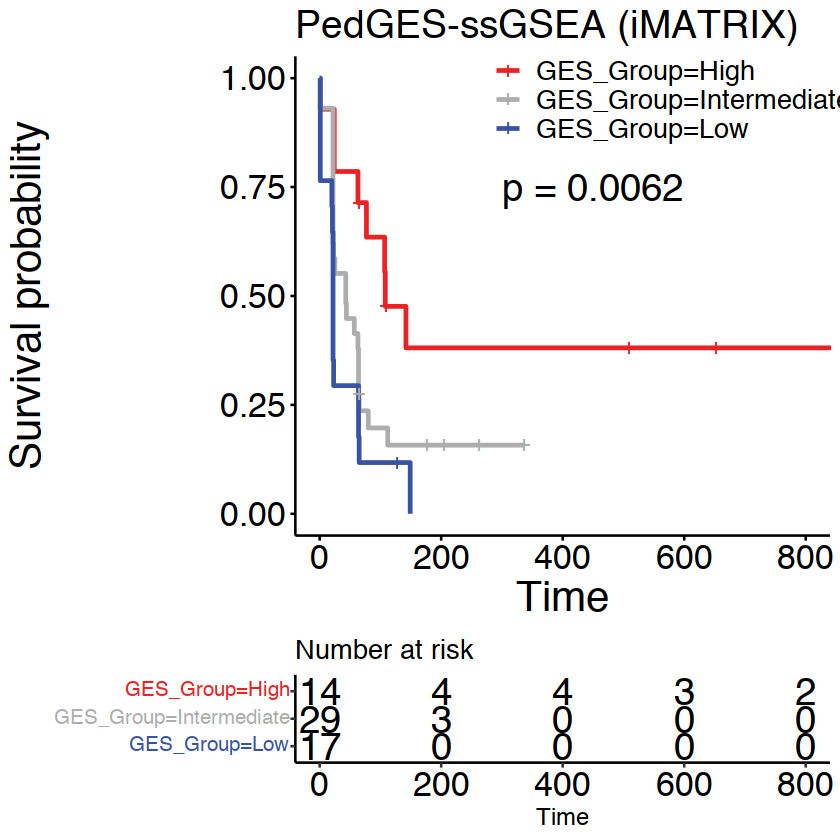

In [60]:
sfit <- survfit(Surv(TRTDUR, progressed)~ GES_Group, data= metadata_modules)
    
kmp <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                          pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),,
                          risk.table=TRUE, fontsize = 8,
                          legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                          font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmp$table <- kmp$table + theme(axis.text.x = element_text(size = 20))
kmp$plot <- kmp$plot + labs(title = "PedGES-ssGSEA (iMATRIX)")
kmp

In [61]:
pdf(file = paste0(plotpath,"KM_pedGES_ssGSEA_IND.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmp
dev.off()

pdf 
  2

In [62]:
f <- as.formula(paste0("Surv(TRTDUR, progressed)~", "PedGES_GSEA"))  
coxmodel <- coxph(f, data=metadata_modules) 
summary(coxmodel)

Call:
coxph(formula = f, data = metadata_modules)

  n= 60, number of events= 49 
   (6 observations deleted due to missingness)

                   coef   exp(coef)    se(coef)      z Pr(>|z|)   
PedGES_GSEA -0.00013069  0.99986932  0.00004351 -3.004  0.00266 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
PedGES_GSEA    0.9999          1    0.9998         1

Concordance= 0.674  (se = 0.045 )
Likelihood ratio test= 9.76  on 1 df,   p=0.002
Wald test            = 9.02  on 1 df,   p=0.003
Score (logrank) test = 9.43  on 1 df,   p=0.002


# Multivariable model

In [63]:
metadata_modules$origin <- NA

metadata_modules$origin[ metadata_modules$sample_origin == "Lymph node"] <- "LN"
metadata_modules$origin[ metadata_modules$sample_origin != "Lymph node"] <- "Other solid"

In [64]:
f <- as.formula(paste0("Surv(TRTDUR, progressed)~", "PedGES_GSEA + sample_origin"))  
coxmodel <- coxph(f, data=metadata_modules) 
summary(coxmodel)

Call:
coxph(formula = f, data = metadata_modules)

  n= 60, number of events= 49 
   (6 observations deleted due to missingness)

                                           coef   exp(coef)    se(coef)      z
PedGES_GSEA                         -0.00013481  0.99986519  0.00005704 -2.364
sample_originBone                    0.08535567  1.08910436  0.67449919  0.127
sample_originBrain                   0.18059355  1.19792819  0.72831733  0.248
sample_originConnective/Soft tissue  0.05192268  1.05329430  0.62993543  0.082
sample_originKidney                 -0.03253658  0.96798704  0.68074612 -0.048
sample_originLung                   -0.20672479  0.81324343  0.61276656 -0.337
sample_originLymph node             -0.50837438  0.60147255  0.67475293 -0.753
sample_originOthers                 -0.89073745  0.41035303  0.66395768 -1.342
                                    Pr(>|z|)  
PedGES_GSEA                           0.0181 *
sample_originBone                     0.8993  
sample_originBrain

# Validate PedGES

# Riaz et al

## Reproduce KM for mutation load Fig 1B

In [65]:
tables2 <- read.csv(file.path(datapath,"Riaz2017/TableS2.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [66]:
tables2$death <- NA
tables2$death[ tables2[,4] == TRUE] <- 1
tables2$death[ tables2[,4] != TRUE] <- 0

In [67]:
tables2$death_time <- tables2[,5]

In [68]:
head(tables2)

,Patient,Cohort,Response,Dead/Alive (Dead = True),Time to Death (weeks),Subtype,Mutational Subtype,M Stage,Mutation Load,Neo-antigen Load,Neo-peptide Load,Cytolytic Score,death,death_time
,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Pt1,NIV3-PROG,PD,TRUE,22.9,CUTANEOUS,NA,M1C,NA,NA,NA,977.87,1,22.9
2,Pt10,NIV3-NAIVE,SD,TRUE,36.6,CUTANEOUS,NF1,M1A,75,33,56,65.84,1,36.6
3,Pt100,NIV3-PROG,PD,TRUE,120.0,OTHER,TripleWt,M1C,6,5,6,NA,1,120.0
4,Pt101,NIV3-PROG,PR,FALSE,119.1,CUTANEOUS,TripleWt,M1A,10,5,6,1392.14,0,119.1
5,Pt102,NIV3-NAIVE,SD,FALSE,90.9,CUTANEOUS,RAS,NA,393,248,770,NA,0,90.9
6,Pt103,NIV3-PROG,PD,FALSE,69.1,CUTANEOUS,TripleWt,M1B,21,5,11,1108.86,0,69.1


In [69]:
summary(tables2$`Mutation Load`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    43.5   182.5   420.4   433.2  7360.0       5 

In [70]:
tables2$mut <- NA
tables2$mut[ tables2[,9] >= 100] <- "High"
tables2$mut[ tables2[,9] < 100] <- "Low"

In [71]:
head(tables2)

,Patient,Cohort,Response,Dead/Alive (Dead = True),Time to Death (weeks),Subtype,Mutational Subtype,M Stage,Mutation Load,Neo-antigen Load,Neo-peptide Load,Cytolytic Score,death,death_time,mut
,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,Pt1,NIV3-PROG,PD,TRUE,22.9,CUTANEOUS,NA,M1C,NA,NA,NA,977.87,1,22.9,NA
2,Pt10,NIV3-NAIVE,SD,TRUE,36.6,CUTANEOUS,NF1,M1A,75,33,56,65.84,1,36.6,Low
3,Pt100,NIV3-PROG,PD,TRUE,120.0,OTHER,TripleWt,M1C,6,5,6,NA,1,120.0,Low
4,Pt101,NIV3-PROG,PR,FALSE,119.1,CUTANEOUS,TripleWt,M1A,10,5,6,1392.14,0,119.1,Low
5,Pt102,NIV3-NAIVE,SD,FALSE,90.9,CUTANEOUS,RAS,NA,393,248,770,NA,0,90.9,High
6,Pt103,NIV3-PROG,PD,FALSE,69.1,CUTANEOUS,TripleWt,M1B,21,5,11,1108.86,0,69.1,Low


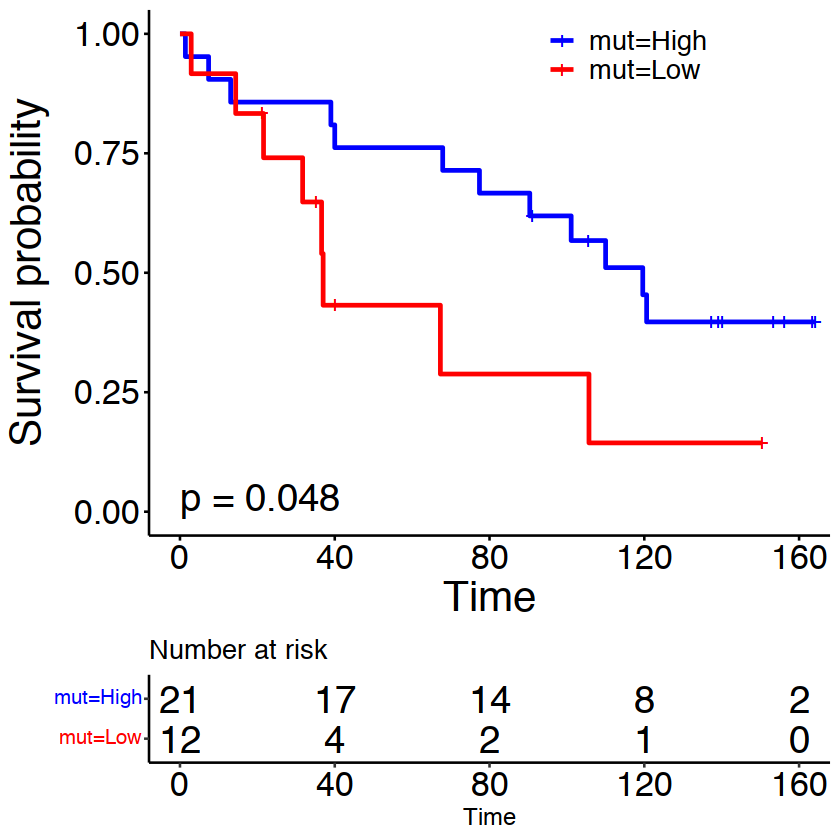

In [72]:
sfit <- survfit(Surv(death_time, death) ~ mut, data= tables2[ tables2$Cohort == "NIV3-NAIVE",])
    
kmp <- ggsurvplot(sfit, conf.int=FALSE, palette = c("blue", "red"),
                          pval = TRUE, pval.size = 8, pval.coord = c(0, 0.03),
                          risk.table=TRUE, fontsize = 8,
                          legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                          font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmp$table <- kmp$table + theme(axis.text.x = element_text(size = 20))
kmp

## Cleanup clinical data and tpm matrix

In [73]:
sra_riaz <- read.csv(file.path(datapath,"Riaz2017/sra_result.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [74]:
head(sra_riaz)

,Experiment Accession,Experiment Title,Organism Name,Instrument,Submitter,Study Accession,Study Title,Sample Accession,Sample Title,"Total Size, Mb",Total RUNs,Total Spots,Total Bases,Library Name,Library Strategy,Library Source,Library Selection
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<int>,<int>,<dbl>,<lgl>,<chr>,<chr>,<chr>
1,SRX2405925,GSM2420376: Pt35_On_AD485758-6; Homo sapiens; RNA-Seq,Homo sapiens,Illumina Genome Analyzer,GEO,SRP094781,Molecular portraits of tumor mutational and micro-environmental sculpting by immune checkpoint blockade therapy,SRS1844646,NA,3618.56,1,54861981,5581752570,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA
2,SRX2405924,GSM2420375: Pt34_Pre_AD466985-6; Homo sapiens; RNA-Seq,Homo sapiens,Illumina Genome Analyzer,GEO,SRP094781,Molecular portraits of tumor mutational and micro-environmental sculpting by immune checkpoint blockade therapy,SRS1844645,NA,2283.17,1,49448678,5035959459,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA
3,SRX2405923,GSM2420374: Pt34_On_AD485757-6; Homo sapiens; RNA-Seq,Homo sapiens,Illumina Genome Analyzer,GEO,SRP094781,Molecular portraits of tumor mutational and micro-environmental sculpting by immune checkpoint blockade therapy,SRS1844644,NA,2363.02,1,50042551,5094172352,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA
4,SRX2405922,GSM2420373: Pt106_On_AD513626-6; Homo sapiens; RNA-Seq,Homo sapiens,Illumina Genome Analyzer,GEO,SRP094781,Molecular portraits of tumor mutational and micro-environmental sculpting by immune checkpoint blockade therapy,SRS1844643,NA,2349.91,1,49047273,4991396262,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA
5,SRX2405921,GSM2420372: Pt106_Pre_AD502250-5; Homo sapiens; RNA-Seq,Homo sapiens,Illumina Genome Analyzer,GEO,SRP094781,Molecular portraits of tumor mutational and micro-environmental sculpting by immune checkpoint blockade therapy,SRS1844641,NA,2924.33,1,61113581,6220438985,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA
6,SRX2405920,GSM2420371: Pt44_On_AD167376-6; Homo sapiens; RNA-Seq,Homo sapiens,Illumina Genome Analyzer,GEO,SRP094781,Molecular portraits of tumor mutational and micro-environmental sculpting by immune checkpoint blockade therapy,SRS1844642,NA,2355.30,1,50434929,5136260093,NA,RNA-Seq,TRANSCRIPTOMIC,cDNA


In [75]:
clinical_riaz <- read.csv(file.path(datapath,"Riaz2017/bms038_clinical_data.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [76]:
dim(clinical_riaz)

[1] 73 17

In [77]:
sra_run <- read.table(file.path(datapath,"Riaz2017/SraRunTable.txt"), sep = ",",
                           header = T, stringsAsFactors = F, check.names = F)

In [78]:
head(sra_run)

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,⋯,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,response,Sample Name,source_name,SRA Study,Tissue
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR5088813,RNA-Seq,101,5265101365,PRJNA356761,SAMN06124981,3569647717,GEO,public,"fastq,sra",⋯,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-01-24T00:00:00Z,PD,GSM2420259,tumor,SRP094781,melanoma
2,SRR5088814,RNA-Seq,101,5356599488,PRJNA356761,SAMN06125034,3648008765,GEO,public,"fastq,sra",⋯,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-01-24T00:00:00Z,PD,GSM2420260,tumor,SRP094781,melanoma
3,SRR5088815,RNA-Seq,101,5081419361,PRJNA356761,SAMN06125033,3501567866,GEO,public,"fastq,sra",⋯,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-01-24T00:00:00Z,SD,GSM2420261,tumor,SRP094781,melanoma
4,SRR5088816,RNA-Seq,101,5163004789,PRJNA356761,SAMN06125032,3389296945,GEO,public,"fastq,sra",⋯,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-01-24T00:00:00Z,SD,GSM2420262,tumor,SRP094781,melanoma
5,SRR5088817,RNA-Seq,101,4985040109,PRJNA356761,SAMN06125031,3432348761,GEO,public,"fastq,sra",⋯,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-01-24T00:00:00Z,UNK,GSM2420263,tumor,SRP094781,melanoma
6,SRR5088818,RNA-Seq,101,5151968812,PRJNA356761,SAMN06125030,3411585335,GEO,public,"fastq,sra",⋯,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-01-24T00:00:00Z,UNK,GSM2420264,tumor,SRP094781,melanoma


In [79]:
tpm_mat_riaz <- read.table(file.path(datapath,"Riaz2017/Riaz_tpm_matrix.txt"), sep = "\t",
                           header = T, stringsAsFactors = F, check.names = F, row.names= 1)

In [80]:
dim(tpm_mat_riaz)

[1] 26475   109

In [81]:
tpm_mat_riaz[1:10,1:10]

,SRR5088813.genes.results,SRR5088814.genes.results,SRR5088815.genes.results,SRR5088816.genes.results,SRR5088817.genes.results,SRR5088818.genes.results,SRR5088819.genes.results,SRR5088820.genes.results,SRR5088821.genes.results,SRR5088822.genes.results
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,9.09,8.82,1.09,1.40,2.22,2.49,3.98,1.18,4.33,49.32
A1BG-AS1,10.72,13.61,2.73,3.64,4.97,5.36,3.40,4.55,6.86,5.90
A1CF,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,4.75
A2M,356.63,284.95,270.70,177.97,171.92,545.81,58.57,383.13,830.91,896.75
A2M-AS1,6.03,5.07,1.22,0.42,4.14,3.42,0.24,0.77,5.03,2.64
A2ML1,0.05,0.04,0.00,0.00,0.11,0.09,0.00,0.01,0.03,0.00
A2MP1,0.10,0.00,0.00,0.00,0.48,0.00,0.11,0.16,0.19,0.00
A3GALT2,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A4GALT,1.81,0.87,5.39,2.13,10.17,20.53,0.25,0.64,4.97,1.90


In [82]:
colnames(tpm_mat_riaz) <- gsub(".genes.results", "", colnames(tpm_mat_riaz))

In [83]:
tpm_mat_riaz[1:10,1:10]

,SRR5088813,SRR5088814,SRR5088815,SRR5088816,SRR5088817,SRR5088818,SRR5088819,SRR5088820,SRR5088821,SRR5088822
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,9.09,8.82,1.09,1.40,2.22,2.49,3.98,1.18,4.33,49.32
A1BG-AS1,10.72,13.61,2.73,3.64,4.97,5.36,3.40,4.55,6.86,5.90
A1CF,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,4.75
A2M,356.63,284.95,270.70,177.97,171.92,545.81,58.57,383.13,830.91,896.75
A2M-AS1,6.03,5.07,1.22,0.42,4.14,3.42,0.24,0.77,5.03,2.64
A2ML1,0.05,0.04,0.00,0.00,0.11,0.09,0.00,0.01,0.03,0.00
A2MP1,0.10,0.00,0.00,0.00,0.48,0.00,0.11,0.16,0.19,0.00
A3GALT2,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A4GALT,1.81,0.87,5.39,2.13,10.17,20.53,0.25,0.64,4.97,1.90


### Make a table of SRR, sample name and pt id

In [84]:
srr_geo <- sra_run[, c("Run","GEO_Accession (exp)")]

In [85]:
head(srr_geo)

,Run,GEO_Accession (exp)
,<chr>,<chr>
1,SRR5088813,GSM2420259
2,SRR5088814,GSM2420260
3,SRR5088815,GSM2420261
4,SRR5088816,GSM2420262
5,SRR5088817,GSM2420263
6,SRR5088818,GSM2420264


In [86]:
geo_filename <- as.data.frame(sra_riaz$`Experiment Title`)

In [87]:
head(geo_filename)

,sra_riaz$`Experiment Title`
,<chr>
1,GSM2420376: Pt35_On_AD485758-6; Homo sapiens; RNA-Seq
2,GSM2420375: Pt34_Pre_AD466985-6; Homo sapiens; RNA-Seq
3,GSM2420374: Pt34_On_AD485757-6; Homo sapiens; RNA-Seq
4,GSM2420373: Pt106_On_AD513626-6; Homo sapiens; RNA-Seq
5,GSM2420372: Pt106_Pre_AD502250-5; Homo sapiens; RNA-Seq
6,GSM2420371: Pt44_On_AD167376-6; Homo sapiens; RNA-Seq


Make filename and Sample

In [88]:
geo_filename$GEO_Accession <- gsub(":.*", "", geo_filename[,1])
geo_filename$filename <- gsub(".*: P", "P", geo_filename[,1])
geo_filename$filename <- gsub("; Homo sapiens; RNA-Seq", "", geo_filename$filename)
geo_filename$Sample <- gsub("_A.*", "", geo_filename$filename)
geo_filename$Sample <- gsub("_E.*", "", geo_filename$Sample)
geo_filename$Sample <- gsub("Pre", "pre", geo_filename$Sample)

In [89]:
head(geo_filename)

,sra_riaz$`Experiment Title`,GEO_Accession,filename,Sample
,<chr>,<chr>,<chr>,<chr>
1,GSM2420376: Pt35_On_AD485758-6; Homo sapiens; RNA-Seq,GSM2420376,Pt35_On_AD485758-6,Pt35_On
2,GSM2420375: Pt34_Pre_AD466985-6; Homo sapiens; RNA-Seq,GSM2420375,Pt34_Pre_AD466985-6,Pt34_pre
3,GSM2420374: Pt34_On_AD485757-6; Homo sapiens; RNA-Seq,GSM2420374,Pt34_On_AD485757-6,Pt34_On
4,GSM2420373: Pt106_On_AD513626-6; Homo sapiens; RNA-Seq,GSM2420373,Pt106_On_AD513626-6,Pt106_On
5,GSM2420372: Pt106_Pre_AD502250-5; Homo sapiens; RNA-Seq,GSM2420372,Pt106_Pre_AD502250-5,Pt106_pre
6,GSM2420371: Pt44_On_AD167376-6; Homo sapiens; RNA-Seq,GSM2420371,Pt44_On_AD167376-6,Pt44_On


Add SRR ID 

In [90]:
geo_filename$SRR <- srr_geo$Run[match(geo_filename$GEO_Accession, srr_geo$`GEO_Accession (exp)`)]

In [91]:
head(geo_filename)

,sra_riaz$`Experiment Title`,GEO_Accession,filename,Sample,SRR
,<chr>,<chr>,<chr>,<chr>,<chr>
1,GSM2420376: Pt35_On_AD485758-6; Homo sapiens; RNA-Seq,GSM2420376,Pt35_On_AD485758-6,Pt35_On,SRR5088930
2,GSM2420375: Pt34_Pre_AD466985-6; Homo sapiens; RNA-Seq,GSM2420375,Pt34_Pre_AD466985-6,Pt34_pre,SRR5088929
3,GSM2420374: Pt34_On_AD485757-6; Homo sapiens; RNA-Seq,GSM2420374,Pt34_On_AD485757-6,Pt34_On,SRR5088928
4,GSM2420373: Pt106_On_AD513626-6; Homo sapiens; RNA-Seq,GSM2420373,Pt106_On_AD513626-6,Pt106_On,SRR5088927
5,GSM2420372: Pt106_Pre_AD502250-5; Homo sapiens; RNA-Seq,GSM2420372,Pt106_Pre_AD502250-5,Pt106_pre,SRR5088926
6,GSM2420371: Pt44_On_AD167376-6; Homo sapiens; RNA-Seq,GSM2420371,Pt44_On_AD167376-6,Pt44_On,SRR5088925


Replace SRR ID with Pt ID for tpm matrix

In [92]:
colnames(tpm_mat_riaz) <- geo_filename$Sample[ match(colnames(tpm_mat_riaz),geo_filename$SRR)]

In [93]:
tpm_mat_riaz[1:10,]

,Pt1_pre,Pt1_On,Pt2_pre,Pt2_On,Pt23_On,Pt23_pre,Pt39_pre,Pt58_On,Pt59_pre,Pt82_pre,⋯,Pt26_On,Pt28_pre,Pt28_On,Pt44_pre,Pt44_On,Pt106_pre,Pt106_On,Pt34_On,Pt34_pre,Pt35_On
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,9.09,8.82,1.09,1.40,2.22,2.49,3.98,1.18,4.33,49.32,⋯,0.93,1.20,1.96,1.45,1.42,2.85,3.95,2.95,1.62,3.60
A1BG-AS1,10.72,13.61,2.73,3.64,4.97,5.36,3.40,4.55,6.86,5.90,⋯,6.27,2.24,2.88,3.13,3.81,6.63,5.67,3.67,2.75,6.58
A1CF,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,4.75,⋯,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A2M,356.63,284.95,270.70,177.97,171.92,545.81,58.57,383.13,830.91,896.75,⋯,73.58,156.47,200.83,624.72,655.18,536.93,345.43,871.25,1314.29,1781.40
A2M-AS1,6.03,5.07,1.22,0.42,4.14,3.42,0.24,0.77,5.03,2.64,⋯,2.03,6.30,2.68,2.65,3.28,1.32,0.20,0.95,1.39,2.37
A2ML1,0.05,0.04,0.00,0.00,0.11,0.09,0.00,0.01,0.03,0.00,⋯,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00
A2MP1,0.10,0.00,0.00,0.00,0.48,0.00,0.11,0.16,0.19,0.00,⋯,0.00,0.00,0.29,0.00,0.11,0.17,0.04,0.00,0.00,0.00
A3GALT2,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00
A4GALT,1.81,0.87,5.39,2.13,10.17,20.53,0.25,0.64,4.97,1.90,⋯,0.53,1.23,2.91,1.84,37.28,6.69,5.06,8.29,5.85,1.92


transpose

In [94]:
tpm_mat_riaz_t <- t(tpm_mat_riaz)

In [95]:
head(tpm_mat_riaz_t)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Pt1_pre,9.09,10.72,0.00,356.63,6.03,0.05,0.10,0.00,1.81,0,⋯,67.21,91.76,3.00,7.25,19.65,0.11,18.40,64.68,8.72,38.41
Pt1_On,8.82,13.61,0.00,284.95,5.07,0.04,0.00,0.00,0.87,0,⋯,89.03,124.19,4.01,7.61,21.38,0.73,20.90,43.02,8.28,55.35
Pt2_pre,1.09,2.73,0.01,270.70,1.22,0.00,0.00,0.26,5.39,0,⋯,26.17,65.70,2.98,6.87,13.21,0.00,13.46,140.19,14.55,25.46
Pt2_On,1.40,3.64,0.00,177.97,0.42,0.00,0.00,0.00,2.13,0,⋯,28.38,75.11,2.86,6.46,11.94,0.01,15.07,104.49,12.35,31.10
Pt23_On,2.22,4.97,0.01,171.92,4.14,0.11,0.48,0.00,10.17,0,⋯,23.16,32.27,1.74,6.31,35.12,0.00,7.62,416.54,13.51,15.81
Pt23_pre,2.49,5.36,0.00,545.81,3.42,0.09,0.00,0.00,20.53,0,⋯,18.65,40.34,3.59,6.97,23.90,0.09,13.17,299.37,22.19,15.68


Log2 transform

In [96]:
tpm_mat_riaz_t <- log2(tpm_mat_riaz_t + 1)

In [97]:
length(rownames(tpm_mat_riaz_t)[grepl("pre", rownames(tpm_mat_riaz_t))])

[1] 51

Match tpm matrix column with clinical data

In [98]:
tpm_mat_riaz_t_matched <- tpm_mat_riaz_t[rownames(tpm_mat_riaz_t) %in% clinical_riaz$Sample,]

In [99]:
dim(tpm_mat_riaz_t_matched)

[1]    51 26475

## PedGES and add to clinical data

In [100]:
module_sample <- matrix(ncol = nrow(tpm_mat_riaz_t_matched), nrow =3)
rownames(module_sample) <- c("TH_13", "TH_26", "TH_27")
colnames(module_sample) <- rownames(tpm_mat_riaz_t_matched)

In [101]:
TH_13 <- c('CD2','CD3D','CD3E','CD3G','CXCR3','THEMIS','UBASH3A')
TH_26 <- "KLHL41"
TH_27 <- c('HLA-B','HLA-F','PSMB9')
PedGES <- c(TH_27, TH_13)

In [102]:
genes <- tpm_mat_riaz_t_matched[,TH_26]
module_sample["TH_26",] <- genes

In [103]:
genes <- tpm_mat_riaz_t_matched[,TH_13]

averagegenes <- apply(genes,1,gm_mean)

module_sample["TH_13",] <- averagegenes

In [104]:
genes <- tpm_mat_riaz_t_matched[,TH_27]

averagegenes <- apply(genes,1,gm_mean)

module_sample["TH_27",] <- averagegenes

In [105]:
module_sample

,Pt1_pre,Pt2_pre,Pt23_pre,Pt39_pre,Pt59_pre,Pt82_pre,Pt49_pre,Pt66_pre,Pt76_pre,Pt85_pre,⋯,Pt29_pre,Pt30_pre,Pt31_pre,Pt8_pre,Pt11_pre,Pt26_pre,Pt28_pre,Pt44_pre,Pt106_pre,Pt34_pre
TH_13,3.6879583,3.7822432,3.099494,0.360461,3.269146,2.636331,4.506845,0.5484146,0.61956216,0.3131138,⋯,2.0377145,1.167806,3.177603,2.823256,3.306527,1.411280,2.596767,3.485427,2.655443,3.9897407
TH_26,0.9634741,0.8718436,1.292782,1.238787,1.189034,2.090853,2.646163,2.8379432,0.08406426,0.6870607,⋯,0.9183862,1.084064,6.743488,1.807355,2.204767,3.330558,3.622930,1.220330,2.272023,0.4646683
TH_27,7.7182568,8.4827865,7.902810,2.724536,8.506747,7.575653,8.925452,7.8536515,6.89581202,6.3335671,⋯,6.4137638,4.814772,9.132919,7.987646,8.741506,6.330976,6.160629,7.771192,8.680300,8.8832138


In [106]:
PedGES

[1] "HLA-B"   "HLA-F"   "PSMB9"   "CD2"     "CD3D"    "CD3E"    "CD3G"   
 [8] "CXCR3"   "THEMIS"  "UBASH3A"

In [107]:
pedges_ssgsea <- GSVA::gsva(t(tpm_mat_riaz_t_matched), list(PedGES), method = "ssgsea", 
                            ssgsea.norm= FALSE)

Warning message in .filterFeatures(expr, method):
“3641 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%



In [108]:
pedges_ssgsea

Pt1_pre,Pt2_pre,Pt23_pre,Pt39_pre,Pt59_pre,Pt82_pre,Pt49_pre,Pt66_pre,Pt76_pre,Pt85_pre,⋯,Pt29_pre,Pt30_pre,Pt31_pre,Pt8_pre,Pt11_pre,Pt26_pre,Pt28_pre,Pt44_pre,Pt106_pre,Pt34_pre
8000.021,8067.088,6768.103,54.02589,7699.687,6499.185,9241.512,3207.809,2726.286,1458.75,⋯,4771.11,3113.046,7529.376,6350.294,7327.881,4220.103,5679.184,7510.68,6459.468,9267.322


In [109]:
module_sample <- rbind(module_sample, pedges_ssgsea)

In [110]:
rownames(module_sample)[4] <- "PedGES_GSEA"

Merge with metadata for survival analysis

In [111]:
module_sample_t <- as.data.frame(t(module_sample))
module_sample_t$Sample <- rownames(module_sample_t)

In [112]:
metadata_modules_riaz <- merge(clinical_riaz, module_sample_t, by = "Sample")

In [113]:
head(metadata_modules_riaz[,1:21])

,Sample,PatientID,SampleType,Cohort,SubtypeEZ,TRTGRP,BOR,myBOR,PFS_SOR,OS_SOR,⋯,OSWK,IBOR,PFS,PFSWK,myBOR2,myBOR3,TH_13,TH_26,TH_27,PedGES_GSEA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Pt1_pre,Pt1,pre,NIV3-PROG,NA,NIV3-PROG,PD,PD,0,0,⋯,22.85714,PROGRESSION,54,7.714286,PD,SDPD,3.6879583,0.9634741,7.718257,8000.021
2,Pt10_pre,Pt10,pre,NIV3-NAIVE,NF1,NIV3-NAIVE,SD,SD,0,0,⋯,36.57143,STABLE DISEASE,119,17.000000,PRCRSD,SDPD,0.8717368,1.9745293,4.558236,2585.039
3,Pt101_pre,Pt101,pre,NIV3-PROG,TripleWt,NIV3-PROG,PR,PRCR,0,1,⋯,119.14286,PARTIAL RESPONSE,612,87.428571,PRCRSD,PRCR,6.0124484,0.3895668,9.389486,11274.915
4,Pt103_pre,Pt103,pre,NIV3-PROG,TripleWt,NIV3-PROG,PD,PD,0,1,⋯,69.14286,PROGRESSION,50,7.142857,PD,SDPD,3.0343396,0.8559897,8.575398,9257.721
5,Pt106_pre,Pt106,pre,NIV3-PROG,BRAF,NIV3-PROG,PD,PD,0,0,⋯,13.00000,PROGRESSION,56,8.000000,PD,SDPD,2.6554430,2.2720232,8.680300,6459.468
6,Pt11_pre,Pt11,pre,NIV3-NAIVE,BRAF,NIV3-NAIVE,PD,PD,0,0,⋯,119.57143,PROGRESSION,59,8.428571,PD,SDPD,3.3065274,2.2047668,8.741506,7327.881


In [114]:
metadata_modules_riaz[ metadata_modules_riaz$PatientID == "Pt2",4:20]

,Cohort,SubtypeEZ,TRTGRP,BOR,myBOR,PFS_SOR,OS_SOR,OS,OSWK,IBOR,PFS,PFSWK,myBOR2,myBOR3,TH_13,TH_26,TH_27
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
9,NIV3-PROG,NA,NIV3-PROG,SD,SD,1,0,275,39.28571,STABLE DISEASE,115,16.42857,PRCRSD,SDPD,3.782243,0.8718436,8.482787


Add tableS2 to clinical data - just to ensure survival data is the same as their paper

In [115]:
colnames(metadata_modules_riaz)[2] <- "Patient"

In [116]:
metadata_modules_riaz_tabS2 <- merge(tables2[, c('Patient','Response','Dead/Alive\n(Dead = True)',
                                                 'Time to Death\n(weeks)','death','death_time','mut')],
                                     metadata_modules_riaz, by = "Patient")

In [117]:
head(metadata_modules_riaz_tabS2[,1:25])

,Patient,Response,Dead/Alive (Dead = True),Time to Death (weeks),death,death_time,mut,Sample,SampleType,Cohort,⋯,OS_SOR,OS,OSWK,IBOR,PFS,PFSWK,myBOR2,myBOR3,TH_13,TH_26
,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,Pt1,PD,TRUE,22.9,1,22.9,NA,Pt1_pre,pre,NIV3-PROG,⋯,0,160,22.85714,PROGRESSION,54,7.714286,PD,SDPD,3.6879583,0.9634741
2,Pt10,SD,TRUE,36.6,1,36.6,Low,Pt10_pre,pre,NIV3-NAIVE,⋯,0,256,36.57143,STABLE DISEASE,119,17.000000,PRCRSD,SDPD,0.8717368,1.9745293
3,Pt101,PR,FALSE,119.1,0,119.1,Low,Pt101_pre,pre,NIV3-PROG,⋯,1,834,119.14286,PARTIAL RESPONSE,612,87.428571,PRCRSD,PRCR,6.0124484,0.3895668
4,Pt103,PD,FALSE,69.1,0,69.1,Low,Pt103_pre,pre,NIV3-PROG,⋯,1,484,69.14286,PROGRESSION,50,7.142857,PD,SDPD,3.0343396,0.8559897
5,Pt106,PD,TRUE,13.0,1,13.0,High,Pt106_pre,pre,NIV3-PROG,⋯,0,91,13.00000,PROGRESSION,56,8.000000,PD,SDPD,2.6554430,2.2720232
6,Pt11,PD,TRUE,119.6,1,119.6,High,Pt11_pre,pre,NIV3-NAIVE,⋯,0,837,119.57143,PROGRESSION,59,8.428571,PD,SDPD,3.3065274,2.2047668


In [118]:
write.csv(metadata_modules_riaz_tabS2,
         file = paste0(datapath,"Riaz2017/metadata_modules_riaz_tabS2.csv"))

I checked OSWK with Time to Death (weeks) and OS_SOR with Dead/Alive (Dead = True).

I think it is safe to consider PFSWK (or PFS in days) and recode PFS_SOR

In [119]:
metadata_modules_riaz_tabS2$progressed <- NA
metadata_modules_riaz_tabS2$progressed[ metadata_modules_riaz_tabS2$PFS_SOR == 1] <- 0
metadata_modules_riaz_tabS2$progressed[ metadata_modules_riaz_tabS2$PFS_SOR == 0] <- 1

## Test PedGES

In [120]:
dim(metadata_modules_riaz_tabS2)

[1] 51 28

In [121]:
pairwise.t.test(metadata_modules_riaz_tabS2$PedGES_GSEA, 
                metadata_modules_riaz_tabS2$BOR, p.adjust = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  metadata_modules_riaz_tabS2$PedGES_GSEA and metadata_modules_riaz_tabS2$BOR 

   CR    NE    PD    PR   
NE 0.835 -     -     -    
PD 0.848 0.922 -     -    
PR 0.273 0.239 0.046 -    
SD 0.814 0.653 0.417 0.180

P value adjustment method: none 

In [122]:
table(metadata_modules_riaz_tabS2$BOR)


CR NE PD PR SD 
 3  2 23  7 16 

In [123]:
library(ggbeeswarm)

In [124]:
tmp <- metadata_modules_riaz_tabS2[ metadata_modules_riaz_tabS2$BOR != "NE",]

In [125]:
tmp$BOR <- factor(tmp$BOR,
      levels = c("PD", "SD", "PR", "CR"))

In [126]:
metadata_modules_riaz_tabS2$GESscale <- scale(metadata_modules_riaz_tabS2$PedGES_GSEA)

In [127]:
borplot <- ggplot(data = tmp, 
       aes(x = BOR, y = PedGES_GSEA)) + geom_boxplot() + 
geom_beeswarm(alpha = 1, cex = 5, size = 3) + 
myplot + myaxis + labs(title = "BOR PedGES - Riaz")

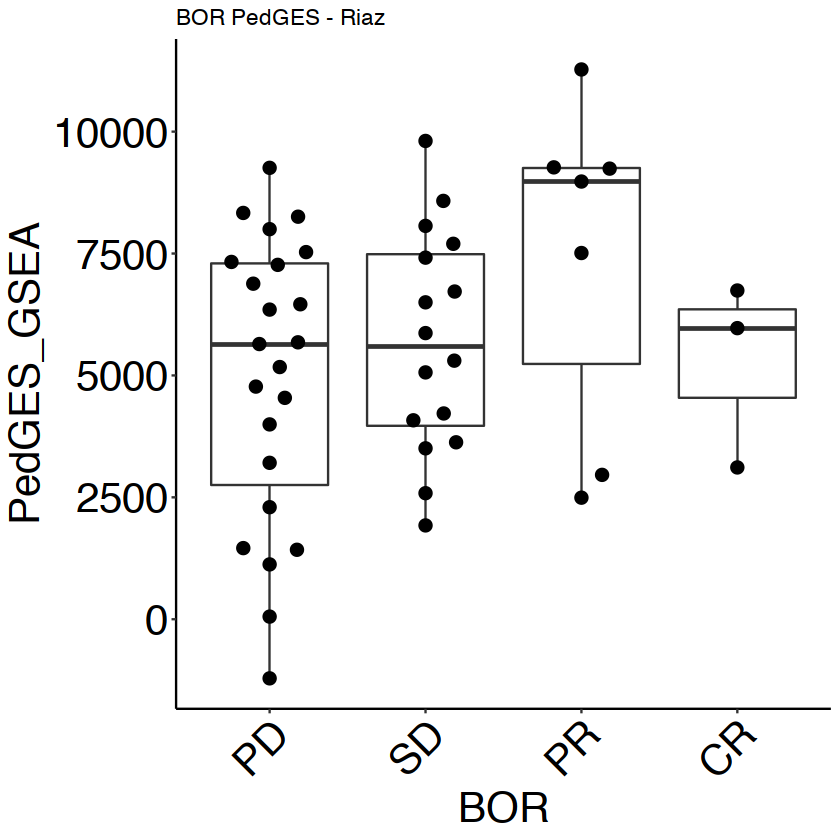

In [128]:
borplot

In [129]:
pdf(file = paste0(plotpath,"pedGES_BOR_Riaz.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
borplot
dev.off()

pdf 
  2

In [130]:
tapply(metadata_modules_riaz_tabS2$PedGES_GSEA, metadata_modules_riaz_tabS2$BOR, summary)

$CR
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3113    4542    5970    5275    6356    6742 

$NE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2726    3737    4747    4747    5758    6768 

$PD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1212    2753    5644    4949    7298    9258 

$PR
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2493    5236    8977    7389    9254   11275 

$SD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1924    3967    5586    5685    7487    9809 


In [131]:
tapply(metadata_modules_riaz_tabS2$PedGES_GSEA, metadata_modules_riaz_tabS2$Cohort, summary)

$`NIV3-NAIVE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1212    3113    5679    5254    7328    9809 

$`NIV3-PROG`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   54.03  3776.48  6214.76  5788.02  8050.32 11274.92 


In [132]:
summary(metadata_modules_riaz_tabS2$PedGES_GSEA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1212    3356    5868    5526    7520   11275 

In [133]:
metadata_modules_riaz_tabS2$GES_group <- NA
metadata_modules_riaz_tabS2$GES_group[ metadata_modules_riaz_tabS2$PedGES_GSEA >= 7520] <- "High"

metadata_modules_riaz_tabS2$GES_group[ metadata_modules_riaz_tabS2$PedGES_GSEA < 7520 &
                                     metadata_modules_riaz_tabS2$PedGES_GSEA > 3356] <- "Intermediate"

metadata_modules_riaz_tabS2$GES_group[ metadata_modules_riaz_tabS2$PedGES_GSEA <= 3356] <- "Low"

In [134]:
table(metadata_modules_riaz_tabS2$GES_group)


        High Intermediate          Low 
          13           25           13 

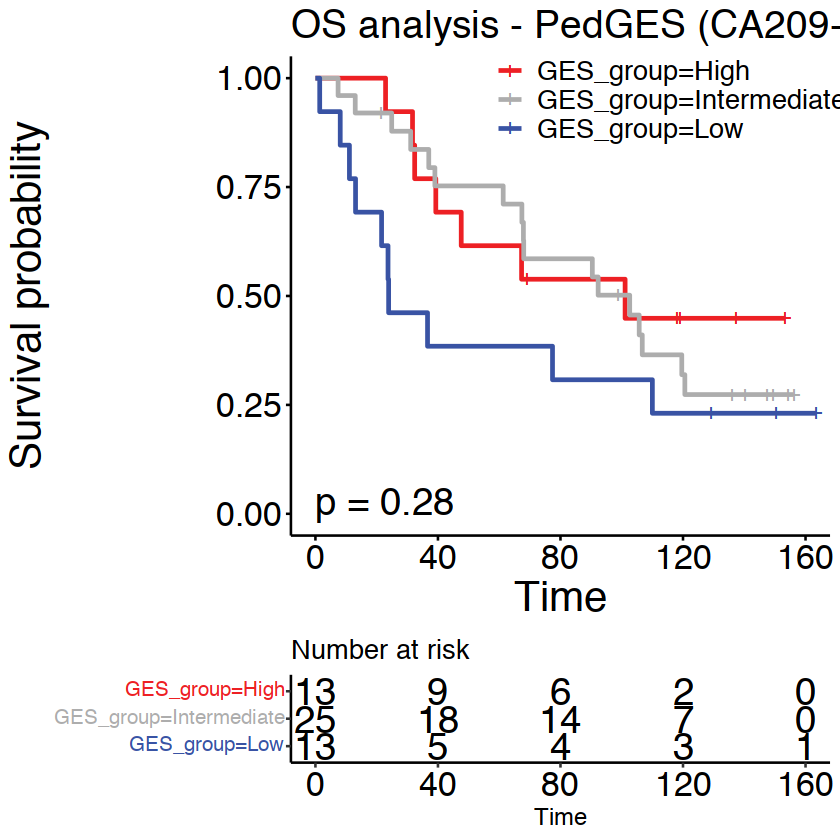

In [135]:
sfit <- survfit(Surv(death_time, death)~ GES_group, 
                data= metadata_modules_riaz_tabS2)
    
kmp <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                          pval = TRUE, pval.size = 8, pval.coord = c(0, 0.03),
                          risk.table=TRUE, fontsize = 8,
                          legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                          font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmp$table <- kmp$table + theme(axis.text.x = element_text(size = 20))
kmp$plot <- kmp$plot  + labs(title = "OS analysis - PedGES (CA209-038)")
kmp

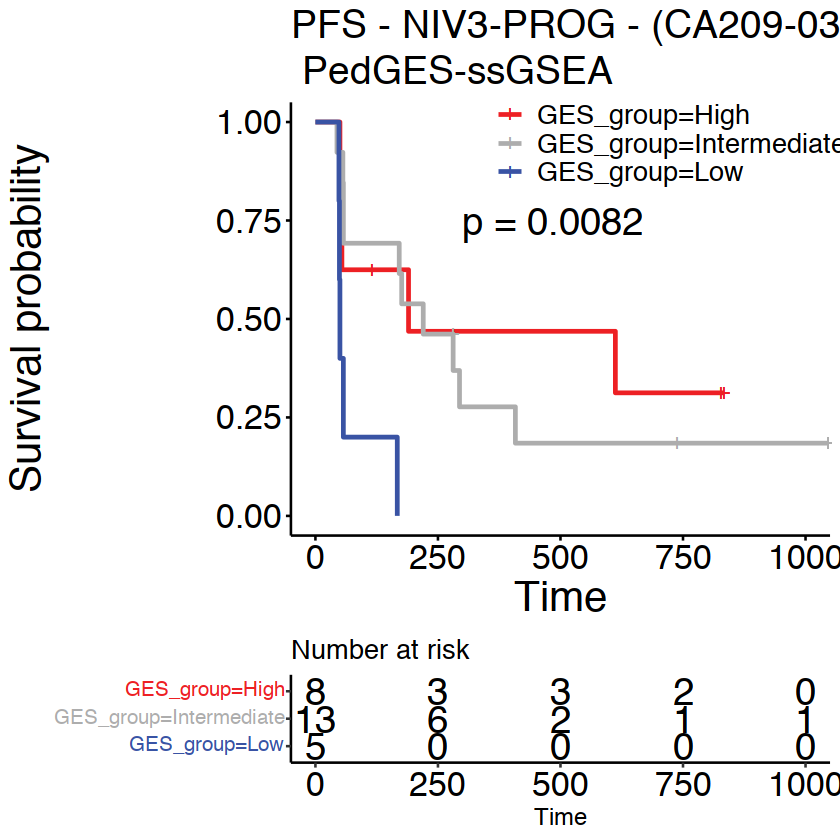

In [136]:
sfit <- survfit(Surv(PFS, progressed)~ GES_group, 
                data= metadata_modules_riaz_tabS2[metadata_modules_riaz_tabS2$Cohort == "NIV3-PROG",])
    
kmp <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                          pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                          risk.table=TRUE, fontsize = 8,
                          legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                          font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmp$table <- kmp$table + theme(axis.text.x = element_text(size = 20))
kmp$plot <- kmp$plot  + labs(title = "PFS - NIV3-PROG - (CA209-038)\n PedGES-ssGSEA")

kmp

In [137]:
pdf(file = paste0(plotpath,"KM_pedGES_ssGSEA_NIV3_PROG_Riaz.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmp
dev.off()

pdf 
  2

In [138]:
summary(metadata_modules_riaz_tabS2$TH_26)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.08406 0.86392 1.23879 1.68362 2.27053 6.74349 

In [139]:
metadata_modules_riaz_tabS2$KLHL <- NA
metadata_modules_riaz_tabS2$KLHL[ metadata_modules_riaz_tabS2$TH_26 >= 2.27053] <- "High"

metadata_modules_riaz_tabS2$KLHL[ metadata_modules_riaz_tabS2$TH_26 < 2.27053 &
                                     metadata_modules_riaz_tabS2$TH_26 > 0.86392] <- "Intermediate"

metadata_modules_riaz_tabS2$KLHL[ metadata_modules_riaz_tabS2$TH_26 <= 0.86392] <- "Low"

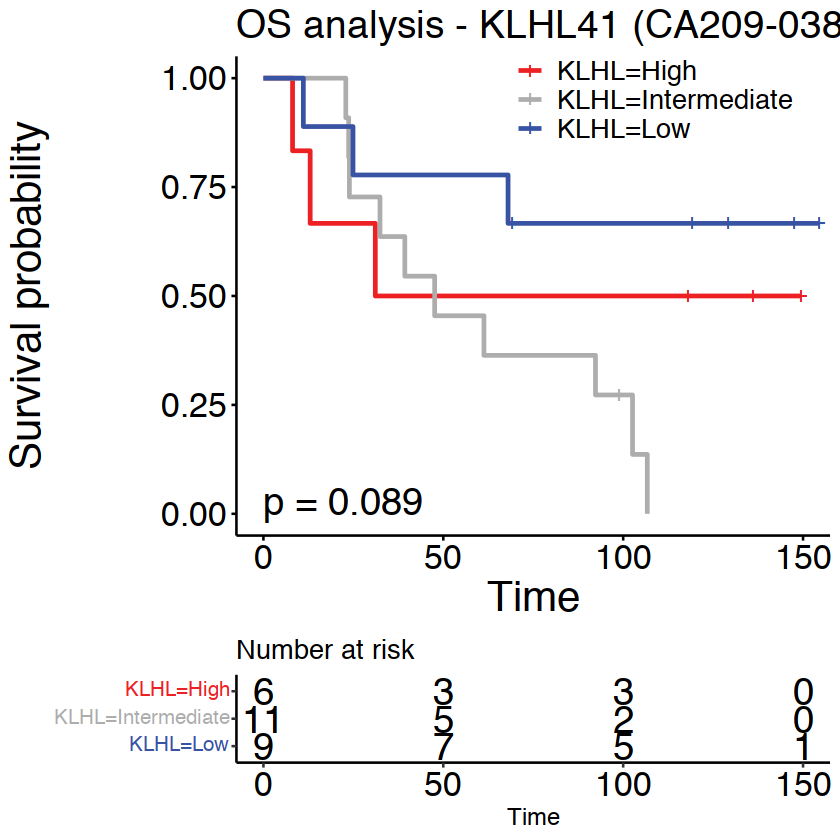

In [140]:
sfit <- survfit(Surv(death_time, death)~ KLHL, 
                data= metadata_modules_riaz_tabS2[metadata_modules_riaz_tabS2$Cohort == "NIV3-PROG",])
    
kmp <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                          pval = TRUE, pval.size = 8, pval.coord = c(0, 0.03),
                          risk.table=TRUE, fontsize = 8,
                          legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                          font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmp$table <- kmp$table + theme(axis.text.x = element_text(size = 20))
kmp$plot <- kmp$plot  + labs(title = "OS analysis - KLHL41 (CA209-038)")
kmp

# INSPIRE

In [141]:
load(file = paste0(datapath,"INSPIRE/INSPIRE.Baseline.RNAseq.for.Arash.RData"))

In [142]:
head(bl.expr.dat)

,INS.A.002.ST,INS.A.003.ST,INS.A.007.ST,INS.A.010.ST,INS.A.012.ST,INS.A.014.ST,INS.A.015.ST,INS.A.018.ST,INS.A.019.ST,INS.A.023.ST,⋯,INS.E.022.ST,INS.E.023.ST,INS.E.024.ST,INS.E.026.ST,INS.E.028.ST,INS.E.029.ST,INS.E.033.ST,INS.E.034.ST,INS.E.035.ST,INS.E.036.ST
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,9.04630599,8.223846,9.0954177,9.7017195,9.6015473,9.026762,9.121869,10.7358473,9.0382719,8.0061798,⋯,8.5858244,9.8567755,10.012609,9.241036,9.0427751,9.469721,8.9253963,6.0863102,8.8430383,8.2950809
TNMD,-0.02634978,1.442968,0.0270745,0.0270745,0.9330326,1.267401,3.909356,0.8102426,0.0270745,0.0270745,⋯,0.0270745,0.0270745,2.779880,2.121763,0.0270745,5.595216,0.8571539,0.0270745,0.0270745,0.0270745
DPM1,10.27746056,10.342035,10.5506869,10.2476824,10.2611399,10.905082,9.978583,10.6700004,10.2066864,10.3966392,⋯,10.3818246,10.8700568,10.388789,11.487275,10.1196814,9.613488,9.8119752,7.8568178,9.9648378,9.9199098
SCYL3,7.84718338,7.419634,7.2681741,7.3913852,7.2514686,8.156991,7.557772,6.5609706,7.6169950,7.5201667,⋯,7.5462785,7.1524501,7.944911,7.698719,7.4629423,7.566050,7.3261616,7.6212323,7.8523173,7.3650120
C1orf112,9.08676914,6.884920,7.9575229,7.2396094,7.8481449,8.381487,6.597225,7.6860901,7.4593755,7.4648451,⋯,8.3670462,9.4741835,7.401050,8.631951,7.1411965,6.993459,7.5679442,8.2434222,8.6354634,6.6387658
FGR,6.08459513,8.392051,7.6204828,8.8170361,6.0405149,7.258205,7.960624,7.3172018,7.9400890,9.2260812,⋯,6.4239679,5.6208179,5.151063,6.732298,8.2057270,8.242025,7.4382844,5.5178852,5.8295155,7.6917728


In [143]:
colnames(bl.expr.dat) <- gsub("[.]", "-", colnames(bl.expr.dat))
colnames(bl.expr.dat) <- gsub("-ST", "", colnames(bl.expr.dat))

In [144]:
TH_13 <- c('CD2','CD3D','CD3E','CD3G','CXCR3','THEMIS','UBASH3A')
TH_26 <- "KLHL41"
TH_27 <- c('HLA-B','HLA-F','PSMB9')
PedGES <- c(TH_27, TH_13)

In [145]:
pedges_ssgsea_ins <- GSVA::gsva(as.matrix(bl.expr.dat), list(PedGES), method = "ssgsea", ssgsea.norm= FALSE)

Warning message in .filterFeatures(expr, method):
“122 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%



In [147]:
rownames(pedges_ssgsea_ins) <- "PedGES_GSEA"

Merge with metadata for survival analysis

In [148]:
pedges_ssgsea_ins_t <- as.data.frame(t(pedges_ssgsea_ins))
pedges_ssgsea_ins_t$PATIENT_ID <- rownames(pedges_ssgsea_ins_t)

In [149]:
ins <- merge(main.df, pedges_ssgsea_ins_t, by = "PATIENT_ID")

In [150]:
summary(ins$PedGES_GSEA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7877   13045   14907   15150   17807   20881 

In [151]:
head(ins)

,PATIENT_ID,COHORT,CANCER_HISTOLOGY,REASON_OFF_TRIAL,LAB_TEST_VIRUS,BEST_OVERALL_RECIST,CB,BEST_RECIST_TM_TARGET,TARGETED_LESION_TM_EARLY,change_ctDNA,⋯,OSevent,OSTIME_Months,OSTIME_Months_since_C3,PFSevent,PFSTIME_Months,PFSTIME_Months_since_C3,TMB_n72,TMB_category,TMB_ctDNA_category_n55,PedGES_GSEA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,⋯,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,INS-A-002,A: Head and Neck,Squamous cell carcinoma of retromolar trigone,Clinical Progression,not tested,SD,0,5.7,5.7,0.25,⋯,1,6.54,5.13,1,2.76,1.35,1.7747,low-TMB,"low-TMB,increase from baseline",14166.59
2,INS-A-003,A: Head and Neck,Squamous cell carcinoma of floor of mouth,Progression,none,PD,0,41.7,41.7,24.82,⋯,1,5.68,4.30,1,1.41,0.03,2.5114,low-TMB,"low-TMB,increase from baseline",15550.09
3,INS-A-007,A: Head and Neck,Squamous cell carcinoma of tongue base,Toxicity,p16 positive,PR,1,-100,-45.5,-0.94,⋯,0,28.78,27.20,1,20.93,19.35,1.4543,low-TMB,"low-TMB,decrease from baseline",18348.79
4,INS-A-010,A: Head and Neck,Squamous cell carcinoma of tonsil,Progression,p16 positive,SD,0,17.8,17.8,-0.31,⋯,1,18.17,16.59,1,4.17,2.60,1.1213,low-TMB,"low-TMB,decrease from baseline",17559.31
5,INS-A-012,A: Head and Neck,Squamous cell carcinoma of soft palate,Toxicity,none,SD,0,-3.7,-3.7,4.29,⋯,1,9.53,8.18,1,3.25,1.91,2.6786,low-TMB,"low-TMB,increase from baseline",10339.28
6,INS-A-014,A: Head and Neck,Squamous cell carcinoma of hypopharynx,Withdrew consent,none,PD,0,39.5,39.5,,⋯,1,3.35,NA,1,1.91,NA,1.9391,low-TMB,,10273.39


In [152]:
table(ins$BEST_OVERALL_RECIST)


CR NE PD PR SD 
 2  1 32 11 19 

In [153]:
ins$PedGES_GSEA <- as.numeric(ins$PedGES_GSEA)

Remove NE 

In [154]:
ins_noNE <- ins[ ins$BEST_OVERALL_RECIST != "NE",]

In [155]:
pairwise.t.test(ins_noNE$PedGES_GSEA, 
                ins_noNE$BEST_OVERALL_RECIST, p.adjust = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  ins_noNE$PedGES_GSEA and ins_noNE$BEST_OVERALL_RECIST 

   CR    PD    PR   
PD 0.827 -     -    
PR 0.280 0.057 -    
SD 0.868 0.331 0.014

P value adjustment method: none 

In [156]:
ins_noNE$BEST_OVERALL_RECIST <- factor(ins_noNE$BEST_OVERALL_RECIST,
                                 levels = c("PD", "SD", "PR", "CR"))

In [157]:
borplot_ins <- ggplot(data = ins_noNE, 
       aes(x = BEST_OVERALL_RECIST, y = PedGES_GSEA)) + geom_boxplot() + 
geom_beeswarm(alpha = 1, cex = 5, size = 3) + 
myplot + myaxis + labs(title = "BOR PedGES - INSPIRE")

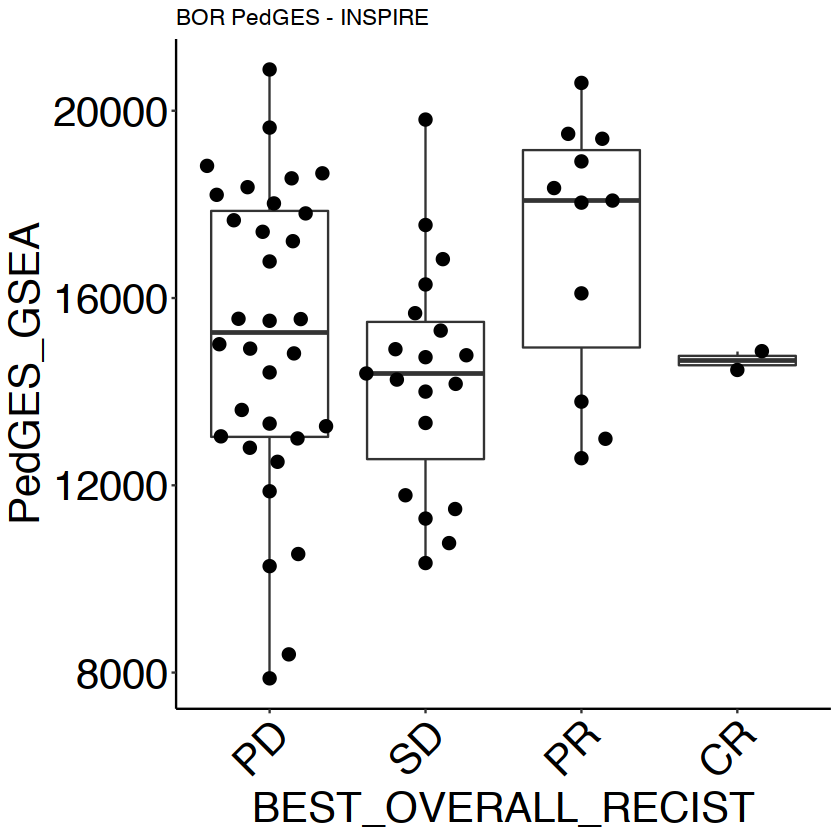

In [158]:
borplot_ins

In [159]:
pdf(file = paste0(plotpath,"pedGES_BOR_INSPIRE.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
borplot_ins
dev.off()

pdf 
  2

In [160]:
#NNE cases included
coxmodel_ins <- coxph(Surv(OSTIME_Months, OSevent)~ scale(PedGES_GSEA) + COHORT, data=ins) 
summary(coxmodel_ins)

Call:
coxph(formula = Surv(OSTIME_Months, OSevent) ~ scale(PedGES_GSEA) + 
    COHORT, data = ins)

  n= 62, number of events= 38 
   (3 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)   
scale(PedGES_GSEA) -0.4496    0.6379   0.1716 -2.620   0.0088 **
COHORTB: Breast     0.1255    1.1337   0.5389  0.233   0.8159   
COHORTC: Ovary     -0.9302    0.3945   0.5732 -1.623   0.1046   
COHORTD: Melanoma  -1.3650    0.2554   0.7005 -1.949   0.0513 . 
COHORTE: Mixed     -0.6516    0.5212   0.4757 -1.370   0.1707   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
scale(PedGES_GSEA)    0.6379     1.5677   0.45567    0.8929
COHORTB: Breast       1.1337     0.8821   0.39427    3.2600
COHORTC: Ovary        0.3945     2.5349   0.12828    1.2131
COHORTD: Melanoma     0.2554     3.9158   0.06471    1.0079
COHORTE: Mixed        0.5212     1.9187   0.20517    1.3240

Co

In [162]:
ins_cox <- forestmodel::forest_model(coxmodel_ins,exponentiate = TRUE) + 
labs(title = "Cox PedGES - INSPIRE")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


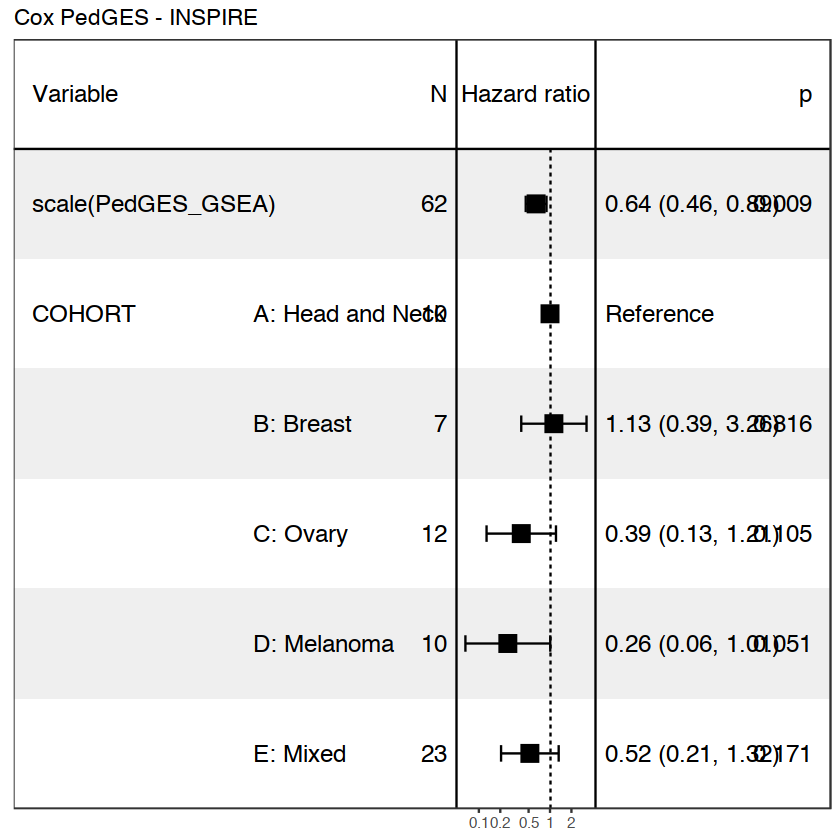

In [163]:
ins_cox

In [164]:
pdf(file = paste0(plotpath,"PedGES_cox_INSPIRE.pdf"),
    width = 10, 
    height = 6,
    useDingbats = FALSE)

ins_cox

dev.off()

pdf 
  2

In [165]:
summary(ins$PedGES_GSEA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7877   13045   14907   15150   17807   20881 

In [166]:
ins$GES_group <- NA
ins$GES_group[ ins$PedGES_GSEA >= 17807] <- "High"

ins$GES_group[ ins$PedGES_GSEA < 17807 &
               ins$PedGES_GSEA > 13045] <- "Intermediate"

ins$GES_group[ ins$PedGES_GSEA <= 13045] <- "Low"

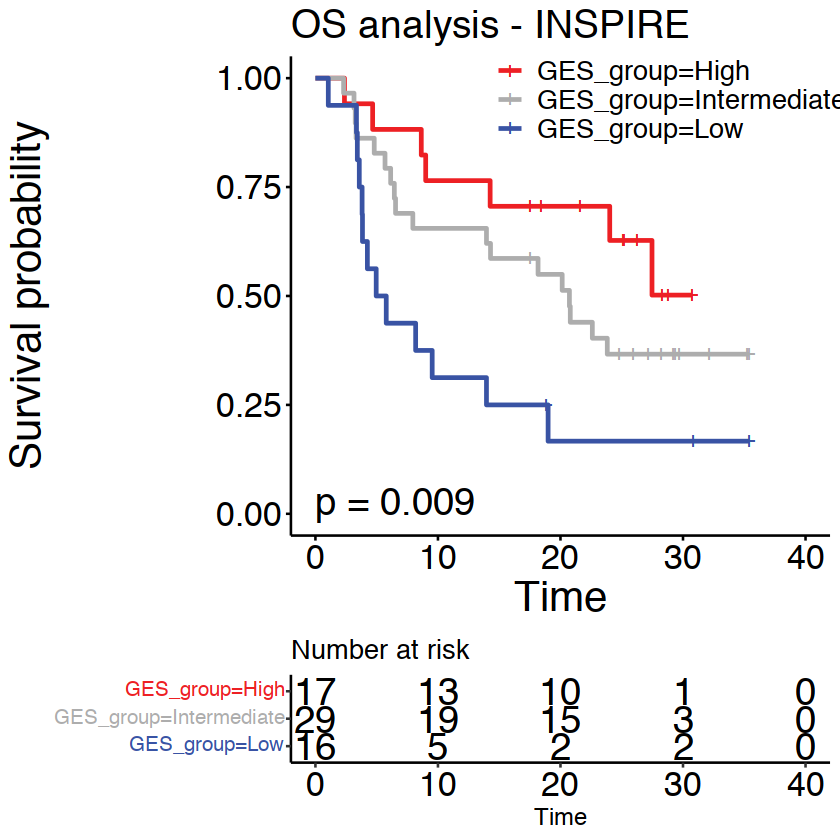

In [167]:
sfit <- survfit(Surv(OSTIME_Months, OSevent)~ GES_group, data= ins)
    
kmp <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                          pval = TRUE, pval.size = 8, pval.coord = c(0, 0.03),
                          risk.table=TRUE, fontsize = 8,
                          legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                          font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmp$table <- kmp$table + theme(axis.text.x = element_text(size = 20))
kmp$plot <- kmp$plot  + labs(title = "OS analysis - INSPIRE")
kmp

In [168]:
pdf(file = paste0(plotpath,"KM_pedGES_ssGSEA_INSPIRE.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmp
dev.off()

pdf 
  2